# Chapter 5: Plottin Chi-Square Distances

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Function to load data from lector_type.csv
def load_data_and_prepare_table():
    """
    Load the CSV data and prepare the table for further calculations.
    """
    # Define the relative path to the CSV file
    data_path = "../data/lector_type.csv"

    # Load the data into a DataFrame
    table = pd.read_csv(data_path, index_col=0)
    
    # Row profiles
    table_pro = table.div(table.sum(axis=1), axis=0)
    
    # Column masses
    table_col_mass = table.sum(axis=0) / table.values.sum()
    
    return table, table_pro, table_col_mass

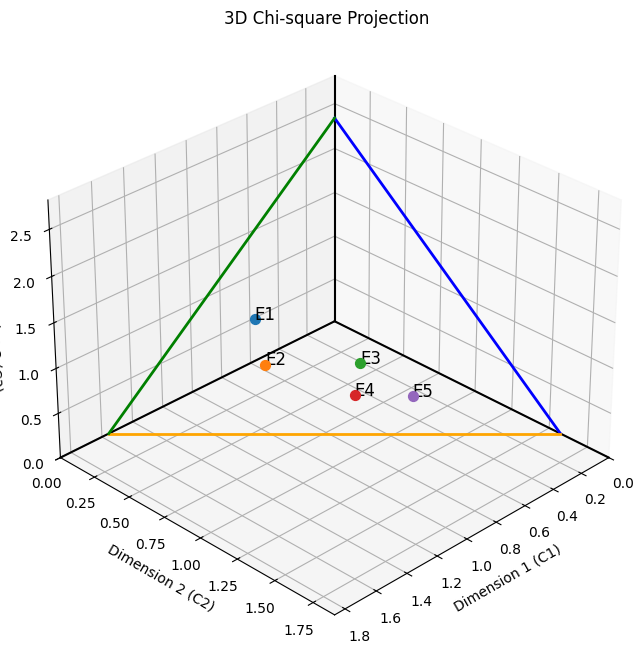

In [16]:
def plot_chi2_3d_projection(table, table_pro, table_col_mass):
    """
    Function to plot the 3D chi-square projection based on table.pro and col masses,
    with the origin at the back of the plot and the axes growing from the origin forward.
    
    Parameters:
    table (DataFrame): The original contingency table.
    table_pro (DataFrame): The row profiles (normalized table).
    table_col_mass (Series): The column masses.
    
    Returns:
    None: Displays a 3D plot.
    """
    # Calculate the weights for the columns
    table_wt = np.sqrt(table_col_mass)
    
    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot axes lines ensuring that the origin is at the back
    ax.plot([0, 1.2 / table_wt.iloc[1]], [0, 0], [0, 0], color='black')  # X-axis
    ax.plot([0, 0], [0, 1.2 / table_wt.iloc[2]], [0, 0], color='black')  # Y-axis
    ax.plot([0, 0], [0, 0], [0, 1.2 / table_wt.iloc[0]], color='black')  # Z-axis

    # Plot the triangle
    ax.plot([0, 0], [0, 1 / table_wt.iloc[2]], [1 / table_wt.iloc[0], 0], color='blue', linewidth=2)
    ax.plot([0, 1 / table_wt.iloc[1]], [1 / table_wt.iloc[2], 0], [0, 0], color='orange', linewidth=2)
    ax.plot([0, 1 / table_wt.iloc[1]], [0, 0], [1 / table_wt.iloc[0], 0], color='green', linewidth=2)

    # Calculate the chi-square standardized coordinates
    table_chi = table_pro.div(table_wt, axis=1)

    # Plot points and add labels for each educational level
    for i, label in enumerate(table.index):
        ax.scatter(table_chi.iloc[i, 1], table_chi.iloc[i, 2], table_chi.iloc[i, 0], s=50)
        ax.text(table_chi.iloc[i, 1], table_chi.iloc[i, 2], table_chi.iloc[i, 0], label, fontsize=12)

    # Set axis labels
    ax.set_xlabel('Dimension 1 (C1)')
    ax.set_ylabel('Dimension 2 (C2)')
    ax.set_zlabel('Dimension 3 (C3)')

    # Set the plot limits
    ax.set_xlim(0, 1.2 / table_wt.iloc[1])
    ax.set_ylim(0, 1.2 / table_wt.iloc[2])
    ax.set_zlim(0, 1.2 / table_wt.iloc[0])

    # Adjust the view angle to ensure the origin is at the back of the plot
    ax.view_init(elev=30, azim=45)

    # Display the plot
    plt.title('3D Chi-square Projection')
    plt.show()


# Load the data and generate the plot
table, table_pro, table_col_mass = load_data_and_prepare_table()
plot_chi2_3d_projection(table, table_pro, table_col_mass)